In [60]:
# Various imports, setup
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [61]:
################
# Read in Data #
################
# For source see '../src/data_sources'

# USGS; 1980 to today, only 6.5+ quakes. 
usgs_quakes = pd.read_csv('../data/raw/usgs_1980_6_5_above.csv')

# NOAA; I think its 1980 to today - josh
noaa_quakes = pd.read_csv('../data/raw/noaa_quakes.tsv', sep='\t')

In [62]:
for col in noaa_quakes.columns:
    print(col)

Search Parameters
Year
Mo
Dy
Hr
Mn
Sec
Tsu
Vol
Location Name
Latitude
Longitude
Focal Depth (km)
Mag
MMI Int
Deaths
Death Description
Missing
Missing Description
Injuries
Injuries Description
Damage ($Mil)
Damage Description
Houses Destroyed
Houses Destroyed Description
Houses Damaged
Houses Damaged Description
Total Deaths
Total Death Description
Total Missing
Total Missing Description
Total Injuries
Total Injuries Description
Total Damage ($Mil)
Total Damage Description
Total Houses Destroyed
Total Houses Destroyed Description
Total Houses Damaged
Total Houses Damaged Description


In [63]:
# What are the magtypes? 
usgs_quakes['magType'].value_counts()

mw     571
mwc    519
mww    448
mwb    225
ms      84
mb      11
ml       3
md       3
mh       3
Mi       1
Name: magType, dtype: int64

# Hypothesis 1
- Deaths correlated with time?  (are we more prepared for earthquakes)
- Are deaths changing over time? (controlling for magnitude)


In [64]:
sub_1 = noaa_quakes[['Year', 'Mag', 'Total Deaths', 'Deaths', 'Damage ($Mil)', 'Total Missing', 'Total Injuries']]

In [65]:
sub_1.corr()

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
Year,1.000000,-0.038045,0.013584,0.012125,0.071494,-0.494449,0.000490
Mag,-0.038045,1.000000,0.127745,0.083345,0.182772,-0.447308,0.134174
Total Deaths,0.013584,0.127745,1.000000,0.832922,0.209509,0.399351,0.794430
Deaths,0.012125,0.083345,0.832922,1.000000,0.215684,0.221591,0.795155
Damage ($Mil),0.071494,0.182772,0.209509,0.215684,1.000000,0.260949,0.495935
Total Missing,-0.494449,-0.447308,0.399351,0.221591,0.260949,1.000000,0.463407
Total Injuries,0.000490,0.134174,0.794430,0.795155,0.495935,0.463407,1.000000


In [66]:
sub_1['Year'].value_counts()

2004.0    78
2008.0    77
2003.0    72
2007.0    67
2018.0    65
2017.0    64
2010.0    62
2019.0    62
2009.0    61
2006.0    61
2005.0    60
2002.0    60
2011.0    60
2014.0    55
2013.0    53
2016.0    52
1990.0    51
2012.0    49
2015.0    48
1983.0    46
1991.0    42
2000.0    37
1989.0    35
1999.0    35
1997.0    34
1980.0    33
1987.0    33
1986.0    33
1994.0    32
1998.0    31
1995.0    31
1985.0    30
1988.0    30
2020.0    29
1984.0    28
1992.0    27
1993.0    26
2001.0    26
1982.0    25
1981.0    22
1996.0    19
2021.0     7
Name: Year, dtype: int64

In [115]:

# Bun magnitudes? by 0.5 then replace as y-axis
alt.Chart(sub_3).mark_rect().encode(
    x='Year:N',
    y=alt.Y('Mag:N', scale=alt.Scale(reverse=True)),
    color='Total Deaths:Q'
)

alt.Chart(...)

In [116]:
sub_1.corr()

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
Year,1.000000,-0.038045,0.013584,0.012125,0.071494,-0.494449,0.000490
Mag,-0.038045,1.000000,0.127745,0.083345,0.182772,-0.447308,0.134174
Total Deaths,0.013584,0.127745,1.000000,0.832922,0.209509,0.399351,0.794430
Deaths,0.012125,0.083345,0.832922,1.000000,0.215684,0.221591,0.795155
Damage ($Mil),0.071494,0.182772,0.209509,0.215684,1.000000,0.260949,0.495935
Total Missing,-0.494449,-0.447308,0.399351,0.221591,0.260949,1.000000,0.463407
Total Injuries,0.000490,0.134174,0.794430,0.795155,0.495935,0.463407,1.000000


<AxesSubplot:>

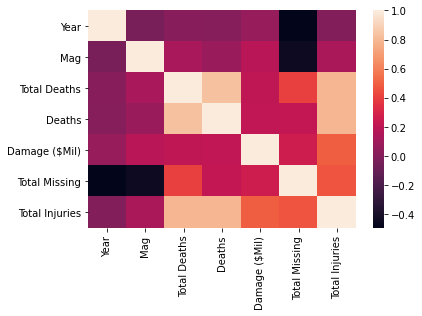

In [78]:
corr = sub_1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# As years increase, total number missing decreases


In [83]:
sub_1.describe()
# Deaths outlier

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
count,1848.000000,1845.000000,814.000000,795.000000,342.000000,23.000000,974.000000
mean,2002.848485,6.020434,1224.626536,935.232704,1774.089351,182.304348,1783.850103
std,11.309965,1.031762,14410.850090,12142.857550,8166.938032,396.996386,17508.094491
min,1980.000000,1.600000,1.000000,1.000000,0.300000,1.000000,1.000000
25%,1994.000000,5.300000,1.000000,1.000000,5.000000,4.000000,8.000000
50%,2005.000000,6.000000,4.000000,4.000000,41.500000,17.000000,35.000000
75%,2012.000000,6.800000,24.000000,22.000000,408.175000,126.000000,174.000000
max,2021.000000,9.100000,316000.000000,316000.000000,100000.000000,1755.000000,374171.000000


In [88]:
sub_1.sort_values('Total Deaths')

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
828,2003.0,6.5,1.0,1.0,NaN,NaN,21.0
1091,2007.0,5.1,1.0,1.0,NaN,NaN,NaN
1090,2007.0,5.1,1.0,1.0,NaN,NaN,5.0
1088,2007.0,4.8,1.0,1.0,NaN,NaN,12.0
1050,2007.0,6.7,1.0,1.0,NaN,NaN,150.0
...,...,...,...,...,...,...,...
1843,2021.0,5.5,NaN,NaN,NaN,NaN,1.0
1844,2021.0,6.4,NaN,NaN,NaN,NaN,14.0
1845,2021.0,6.9,NaN,NaN,NaN,NaN,NaN
1846,2021.0,7.7,NaN,NaN,NaN,NaN,NaN


In [110]:
sub_3 = sub_1[sub_1['Total Deaths'].notna()]
sub_3.shape


(814, 7)

In [111]:
# Definitely an outlier in 2010 and 2004 that were very deadly
sub_3.sort_values('Total Deaths')

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
828,2003.0,6.5,1.0,1.0,NaN,NaN,21.0
1091,2007.0,5.1,1.0,1.0,NaN,NaN,NaN
1090,2007.0,5.1,1.0,1.0,NaN,NaN,5.0
1088,2007.0,4.8,1.0,1.0,NaN,NaN,12.0
1050,2007.0,6.7,1.0,1.0,NaN,NaN,150.0
...,...,...,...,...,...,...,...
342,1990.0,7.3,40000.0,40000.0,7200.0,NaN,105000.0
964,2005.0,7.6,76213.0,76213.0,6680.0,NaN,146599.0
1132,2008.0,7.9,87652.0,87652.0,86000.0,NaN,374171.0
916,2004.0,9.1,227899.0,1001.0,10000.0,NaN,NaN
